Pandas for managing datasets

In [1]:
import pandas as pd

Matplotlib for additional customization

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

Seaborn for plotting and styling

In [3]:
import seaborn as sns
sns.set()

Read dataset

In [4]:
df = pd.read_csv('UTSEUS-anjuke-real-estate.csv', index_col=0)

Display first 5 observations

In [5]:
df.head()

,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
id,,,,,,,,,,,,
A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


1. Scatter plot

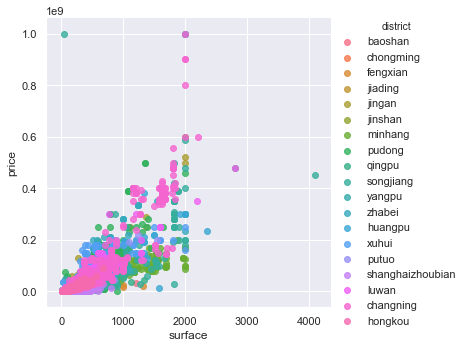

In [6]:
sns.lmplot(x='surface', y='price', data=df,
          fit_reg=False, # No regression line
          hue='district') # Color by district

Customizing with Matplotlib

(0, 4351.119267991637)

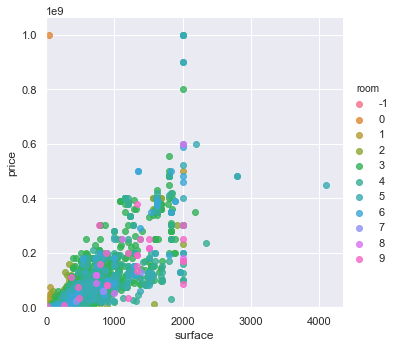

In [7]:
sns.lmplot(x='surface', y='price', data=df,
          fit_reg=False, # No regression line
          hue='room') # Color by district
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

Default boxplot, log scale for better visu

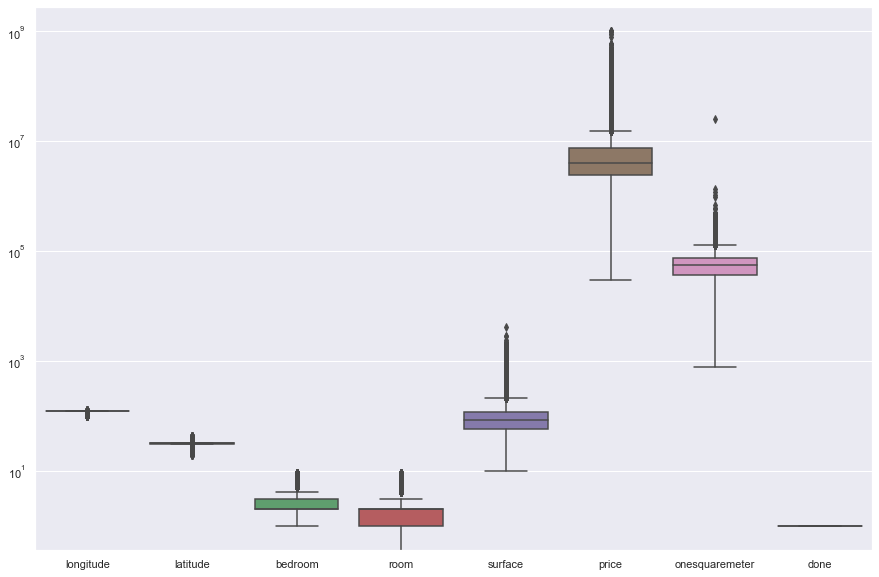

In [8]:
plt.figure(figsize=(15,10))
plt.yscale("log")
sns.boxplot(data=df)

Pre-format DataFrame

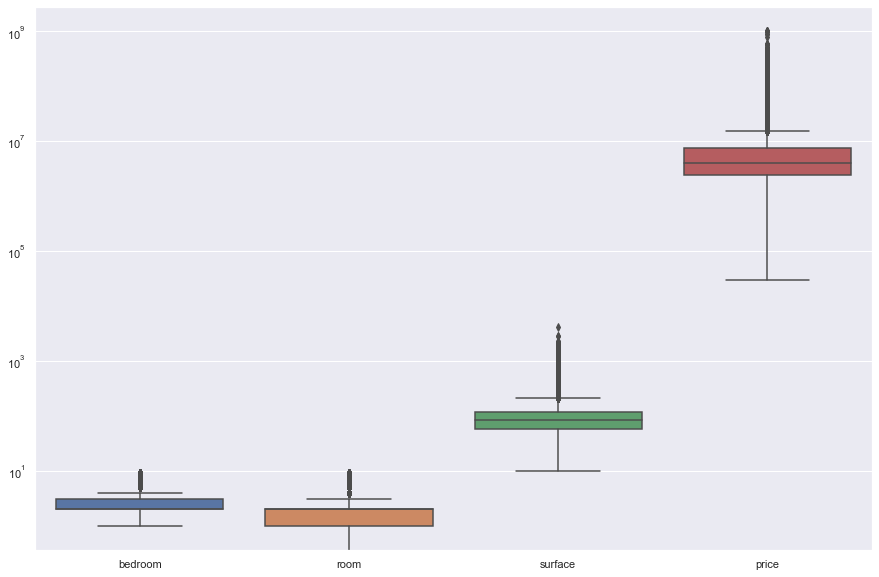

In [9]:
surface_df = df.drop(['longitude', 'latitude', 'done', 'onesquaremeter'], axis=1)
plt.figure(figsize=(15,10))
plt.yscale("log")
sns.boxplot(data=surface_df)

Set theme, then plot violin plot

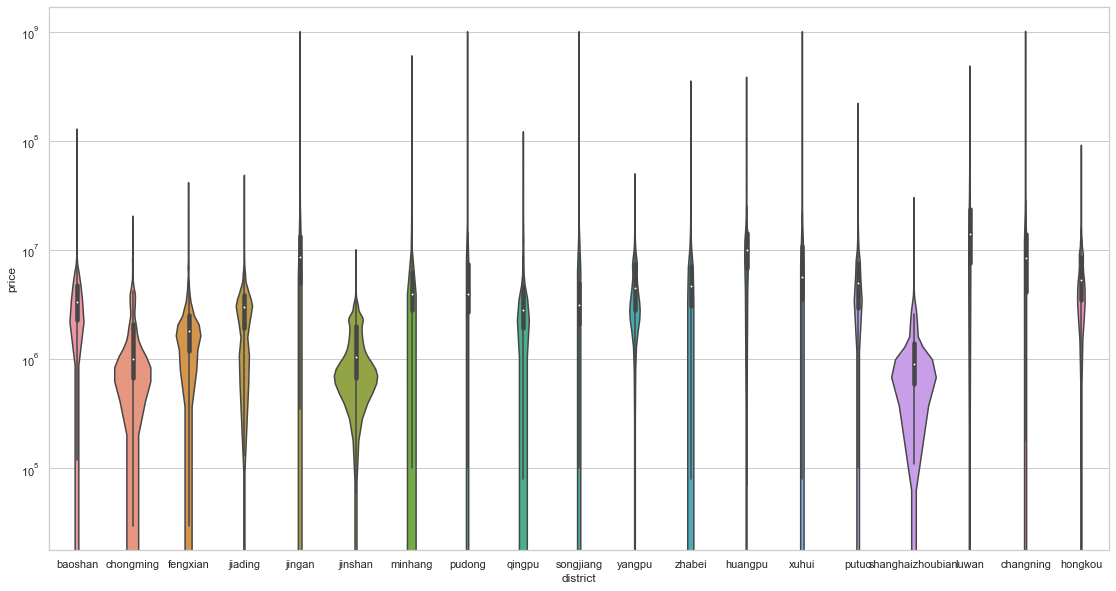

In [10]:
# Set theme
sns.set_style('whitegrid')
plt.figure(figsize=(19,10))
plt.yscale("log")
 
# Violin plot
sns.violinplot(x='district', y='price', data=df)

District color palette

In [11]:
district_type_colors = ['#e6194B',
                        '#3cb44b', 
                        '#ffe119', 
                        '#4363d8', 
                        '#f58231', 
                        '#911eb4', 
                        '#42d4f4', 
                        '#f032e6', 
                        '#bfef45', 
                        '#fabebe', 
                        '#469990', 
                        '#e6beff', 
                        '#9A6324', 
                        '#fffac8', 
                        '#800000', 
                        '#aaffc3', 
                        '#808000', 
                        '#ffd8b1', 
                        '#000075'
                    ]

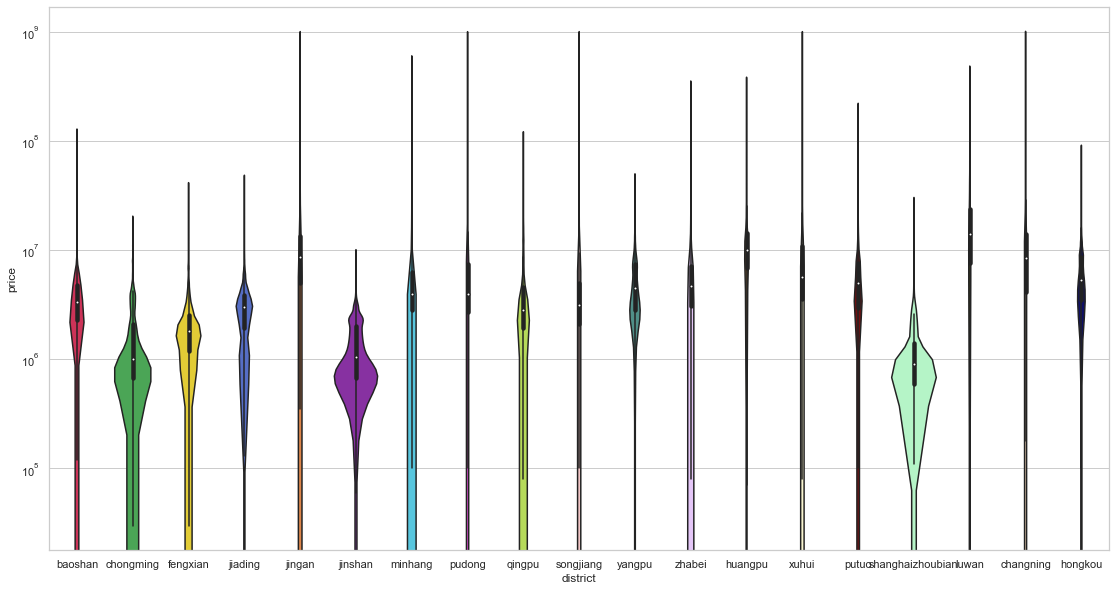

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(19,10))
plt.yscale("log")
sns.violinplot(x='district', y='price', data=df, 
               palette=district_type_colors) # Set color palette

Swarm plot

In [13]:
short_df = df[:3000]

Get a shorter randomized dataset

In [15]:
import numpy as np

In [24]:
df['subset'] = np.random.uniform(0, 1, len(df)) < 0.007
short_rand_df = df[df['subset']==True]
len(short_rand_df)

3210

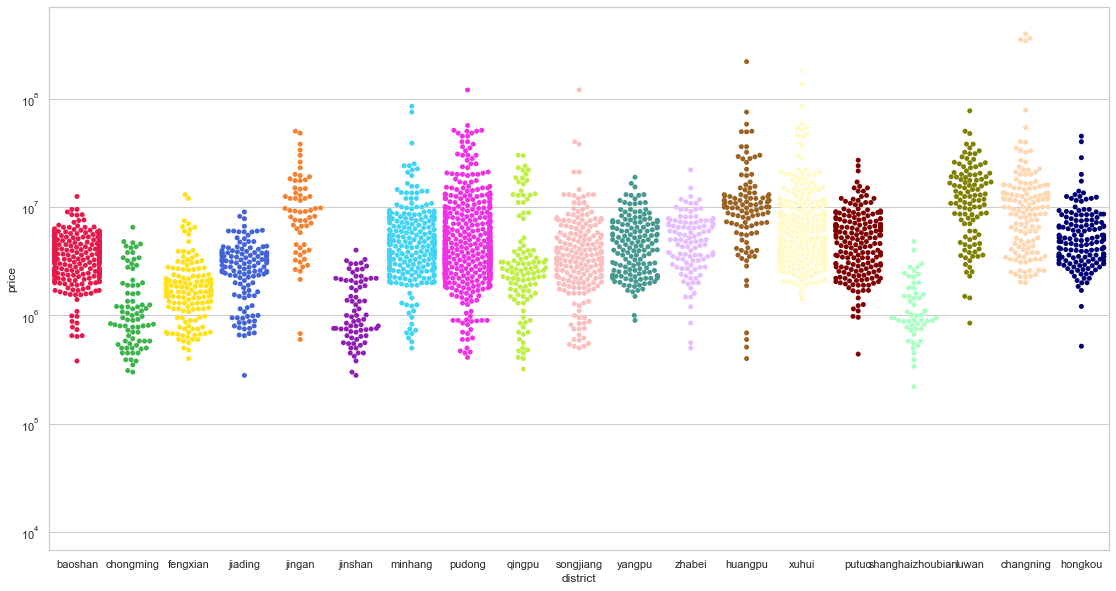

In [25]:
plt.figure(figsize=(19,10))
plt.yscale("log")
sns.swarmplot(x='district', y='price', data=short_rand_df, 
              palette=district_type_colors)

Overlaying swarm and violin plots

Text(0.5, 1.0, 'Price by District')

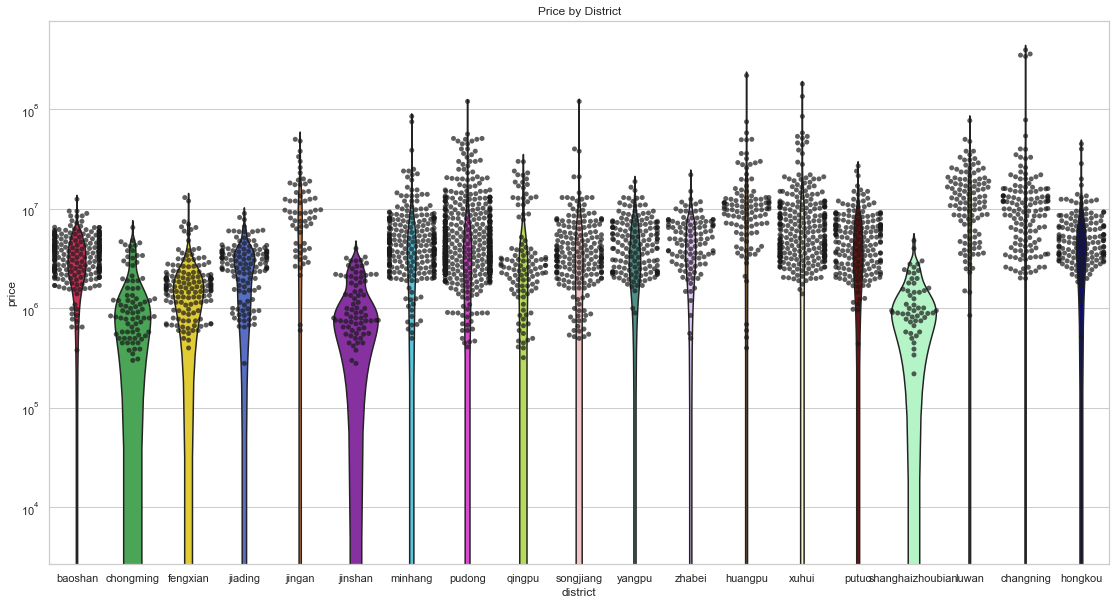

In [27]:
plt.figure(figsize=(19,10))
plt.yscale("log")

# Create plot
sns.violinplot(x='district', y='price', data=short_rand_df,
               inner=None,
               palette=district_type_colors)

sns.swarmplot(x='district', 
              y='price', 
              data=short_rand_df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

# Set title with matplotlib
plt.title('Price by District')

Density plot

Melt DataFrame

In [39]:
surface_df.head()

,address,bedroom,room,surface,price,tags,district,neighborhood
id,,,,,,,,
A888553302,宝山-大场 金地艺境(宝山)(555弄),2,2,30.0,1160000.0,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang
A888376847,宝山-大场 骏华苑,1,1,38.0,1950000.0,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang
A885088482,宝山-大场 琉樽尚品(255弄),3,2,92.0,5350000.0,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang
A885392981,宝山-大场 琉樽尚品（255弄）,2,2,68.0,4350000.0,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang
A885831305,宝山-大场 美好家小区,2,2,80.0,4000000.0,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang


In [81]:
df['subset'] = np.random.uniform(0, 1, len(df)) < 0.003
short_rand_df = df[df['subset']==True]
len(short_rand_df)

1434

In [82]:
short_rand_surf_df = short_rand_df.drop(['longitude', 'latitude', 'done', 'onesquaremeter', 'subset'], axis=1)

In [83]:
melted_df = pd.melt(short_rand_surf_df,
                   id_vars=['address', 'price', 'tags', 'district', 'neighborhood', 'surface'],
                   var_name='RoomsNumber'
                   )

In [84]:
melted_df.head()

,address,price,tags,district,neighborhood,surface,RoomsNumber,value
0,宝山-大场 琉樽尚品（255弄）,3350000.0,降价20万，动迁无税少18万，户型正气，诚意出售，看房有钥匙,baoshan,dachang,55.0,bedroom,1
1,宝山-大场 滨江雅苑,5200000.0,低总价大两房，房东诚意出售，比较便宜的！采光充足满五！,baoshan,dachang,99.0,bedroom,2
2,宝山-大华 大华一村(1508弄),2750000.0,大华一村 全明一房 低于市场价 房东置换急售,baoshan,dahua,44.0,bedroom,1
3,宝山-大华 大华公园世家康华苑(1681弄),5300000.0,还在看虚假价格吗？浪费您宝贵时间，来我这里看看价格都是真实的,baoshan,dahua,87.0,bedroom,2
4,宝山-大华 宝隆大厦,900000.0,近地铁，精装修，低总价，大润发500米，对口*，拎包住！！,baoshan,dahua,58.0,bedroom,2


In [85]:
print(short_rand_surf_df.shape)

(1434, 8)


In [86]:
print(melted_df.shape)

(2868, 8)


Swarmplot with melted_df

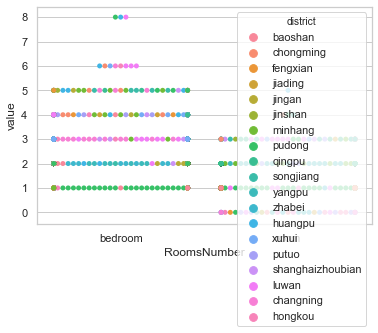

In [87]:
sns.swarmplot(x='RoomsNumber', y='value', data=melted_df, 
              hue='district')

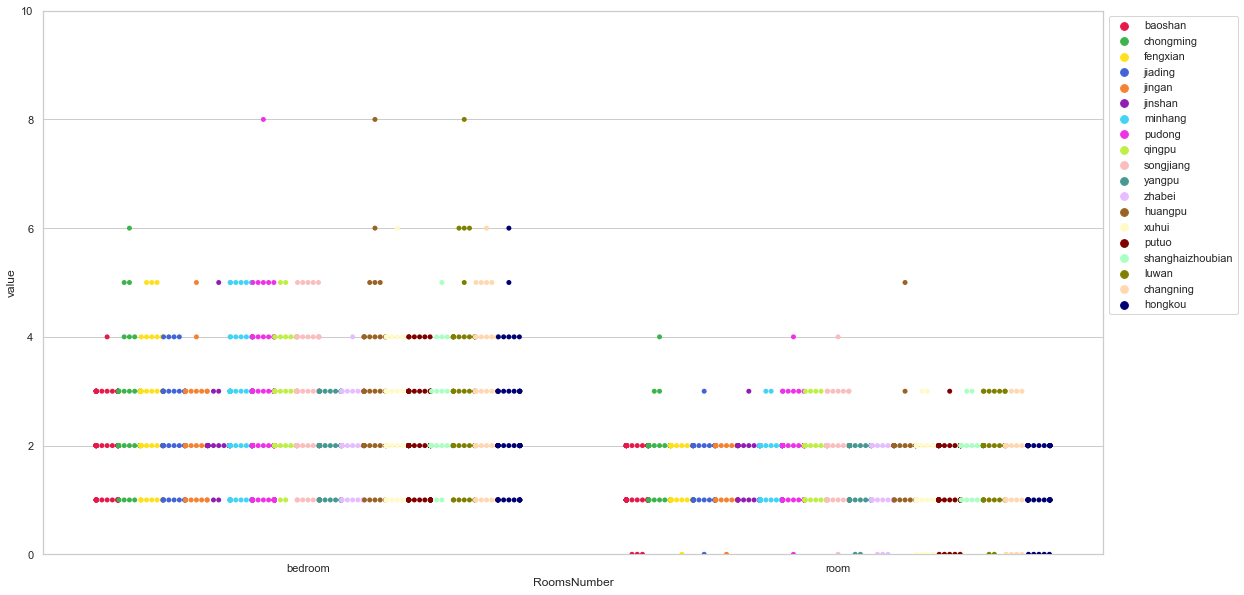

In [88]:
plt.figure(figsize=(19,10))

sns.swarmplot(x='RoomsNumber', 
              y='value', 
              data=melted_df, 
              hue='district',
              dodge=True,
              palette=district_type_colors
             )

plt.ylim(0,10)

plt.legend(bbox_to_anchor=(1,1), loc=2)

Heatmap

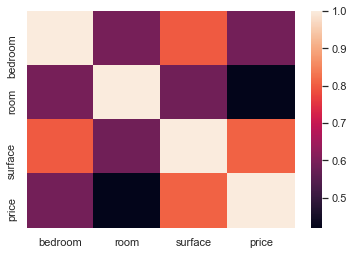

In [89]:
# Calculate correlations
corr = short_rand_surf_df.corr()

# Heatmap
sns.heatmap(corr)

Histogram

(0, 500)

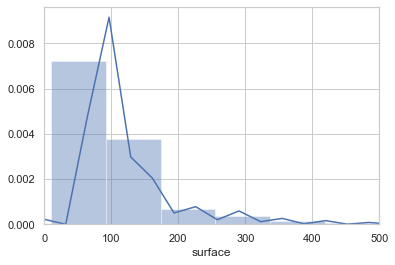

In [98]:
#Distribution Plot
sns.distplot(df.surface)
plt.xlim(0,500)

Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

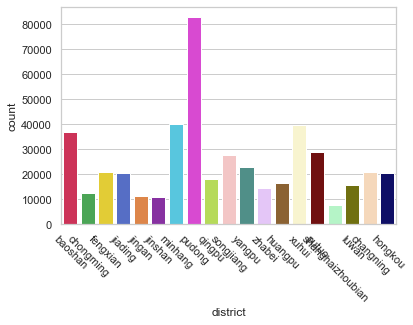

In [99]:
sns.countplot(x='district', data=df, palette=district_type_colors)
plt.xticks(rotation=-45)

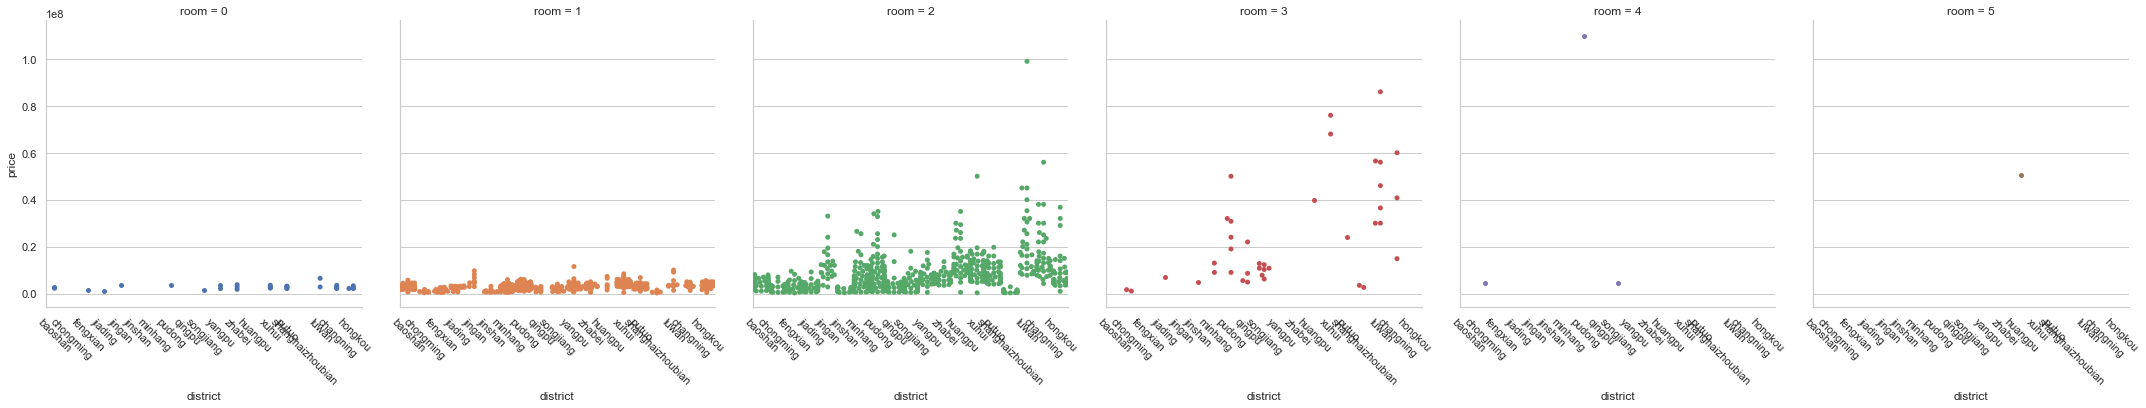

In [102]:
g = sns.factorplot(x='district',
                   y='price',
                   data=short_rand_surf_df,
                   hue='room',
                   col='room',
                   kind='swarm'
                  )

g.set_xticklabels(rotation=-45)

Density Plot

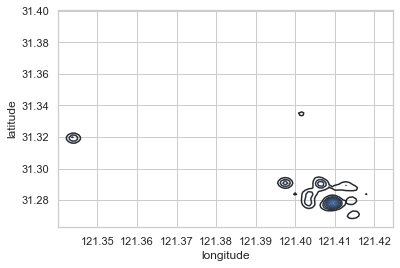

In [106]:
sns.kdeplot(short_df.longitude, short_df.latitude)

Joint Distribution Plot

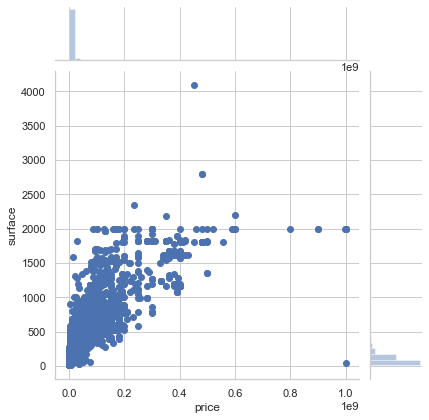

In [107]:
sns.jointplot(x='price', y='surface', data=df)